## Combined Model
##### To build final model we have considered top 6 datasets which gave good results. The datasets used are related to Health-care expenditure, Military-Expenditure, Poverty, GDP per capita, Internet, Agriculture Production Index.

In [1]:
#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score


#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.model_selection import GridSearchCV
#library for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE

#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
#ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Libraries for Unsupervised learning
from sklearn.cluster import KMeans,AgglomerativeClustering

#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

from imblearn.under_sampling import RandomUnderSampler,TomekLinks
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.combine import SMOTEENN,SMOTETomek
from imblearn.ensemble import BalanceCascade, EasyEnsemble,BalancedBaggingClassifier,BalancedRandomForestClassifier

from itable import PrettyTable,CellStyle,TableStyle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Utility Method to plot confusion matrix
def plotConfusionMatrix(cm):
    sns.set_style('white')
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Developed','Developing']
    plt.title('Confusion Matrix',fontsize = 15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### Read Data from CSV

In [3]:
data_poverty = pd.read_csv('Poverty-output.csv')
data_internet = pd.read_csv('Internet-Output.csv')
data_gdp = pd.read_csv('Gdp-output.csv')
data_military = pd.read_csv('Military-output.csv')
data_agriculture = pd.read_csv('Agriculture-output.csv')
data_health = pd.read_csv('Health-Output.csv')

data = pd.concat([data_poverty,data_internet,data_gdp,data_military,data_agriculture,data_health])

In [4]:
data.head(5)

,Unnamed: 0,id,normalized__abs_energy,normalized__absolute_sum_of_changes,"normalized__agg_autocorrelation__f_agg_""mean""","normalized__agg_autocorrelation__f_agg_""median""","normalized__agg_autocorrelation__f_agg_""var""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","normalized__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""",...,normalized__time_reversal_asymmetry_statistic__lag_2,normalized__time_reversal_asymmetry_statistic__lag_3,normalized__value_count__value_-inf,normalized__value_count__value_0,normalized__value_count__value_1,normalized__value_count__value_inf,normalized__value_count__value_nan,normalized__variance,normalized__variance_larger_than_standard_deviation,label
0,0,Albania,0.000880,0.034006,-0.207301,-0.009288,0.123878,0.103082,-1.000000,-0.056323,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000029,0.0,1
1,1,Algeria,0.008731,0.063762,-0.662088,-0.662088,0.236452,0.103082,-1.000000,-0.056323,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000822,0.0,1
2,2,Angola,0.220140,0.023379,-1.000000,-1.000000,0.000000,0.103082,-1.000000,-0.056323,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000137,0.0,1
3,3,Argentina,0.063581,0.308183,0.080516,0.120244,0.337182,0.085724,-0.164281,-0.010627,...,1.680193e-08,0.000004,0.0,2.0,0.0,0.0,0.0,0.001046,0.0,1
4,4,Armenia,0.129814,0.243358,-0.419327,-0.443550,0.443094,0.205101,-1.000000,-0.180659,...,-9.140289e-04,-0.000831,0.0,0.0,0.0,0.0,0.0,0.003868,0.0,1


#### Get data insights

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 192
Columns: 797 entries, Unnamed: 0 to label
dtypes: float64(794), int64(2), object(1)
memory usage: 7.8+ MB


In [6]:
#lets check number of unique countries we have in dataset
data['id'].nunique()

352

In [7]:
data['label'].value_counts()

1    1070
0     207
Name: label, dtype: int64

In [8]:
y = data['label']
X = data.drop(columns=['Unnamed: 0', 'id','label'])

In [9]:
# train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [10]:
y_train.value_counts()

1    644
0    122
Name: label, dtype: int64

In [11]:
y_test.value_counts()

1    426
0     85
Name: label, dtype: int64

## Supervised learning techniques

#### Support Vector Machine

In [12]:
clf = svm.SVC(gamma='auto',C=10,kernel='rbf')
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))

Area Under Curve 0.6153134493233914


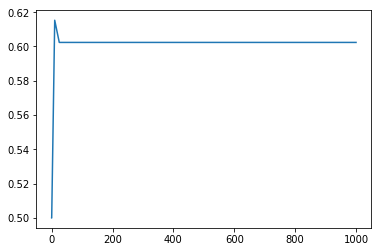

In [13]:
#SVM Fine tunning
cVals = [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]
f1_scores = []
for c in cVals:
    clf = svm.SVC(gamma='auto',C=c,kernel='rbf')
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    f1_scores.append(metrics.auc(fpr,tpr))
    
plt.plot(cVals,f1_scores)

#### Output with best parameters for SVM

Area Under Cureve 0.6153134493233914


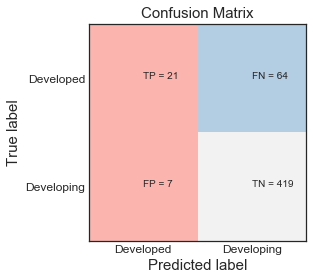

In [14]:
clf = svm.SVC(gamma='auto',C=10,kernel='rbf')
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Cureve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

#### Logistic Regression

Area Under Curve 0.7390223695111847


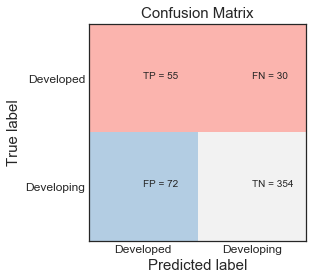

In [15]:
#Logistic Regression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

###### KNN with k ranging from 1 to 15

Text(0.5,0,'K values')

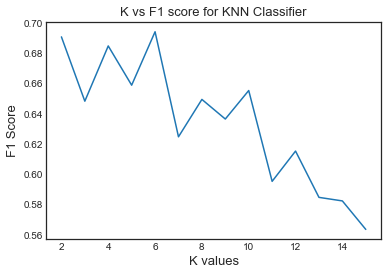

In [16]:
#KNN for different k values
kVals = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
    
plt.plot(kVals,scores)
plt.title('K vs F1 score for KNN Classifier',fontsize = 13)
plt.ylabel('F1 Score',fontsize=13)
plt.xlabel('K values',fontsize=13)

#### Output with best value of K

Area Under Cureve 0.6942143054404861


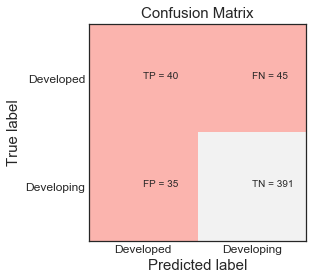

In [17]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Cureve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

#### Decision Tree Classifier

Area Under Curve 0.7189312344656172


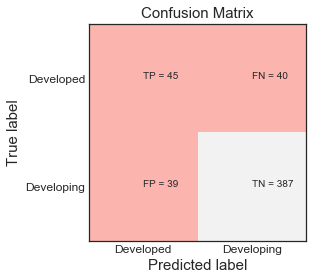

In [18]:
#DT
d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_classifier.fit(X_train,y_train)
pred = d_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

#### Bagging Classifier with Decision Tree as base estimator

[0.7718171775752556, 0.7623998895332781, 0.7718033692350178, 0.7718033692350178, 0.7929853631593482]


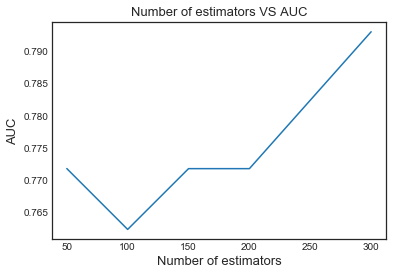

In [19]:
estimators = [50,100,150,200,300]
scores = []
for e in estimators:
    cart = DecisionTreeClassifier()
    model = BaggingClassifier(base_estimator=cart, n_estimators=e, n_jobs=3,random_state=7)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
    
plt.plot(estimators,scores) 
plt.title("Number of estimators VS AUC",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)
print(scores)

Area Under Curve 0.7929853631593482


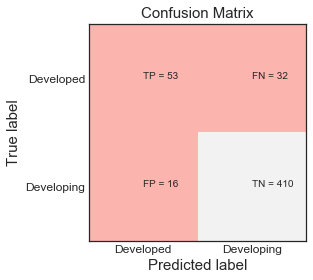

In [20]:
#Bagging Classifier with Decision tree as base learner
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=300, random_state=7)
model.fit(X_train, y_train)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

#### Random Forest Classifier

#### Fine tuninng Random Forest for different number of estimators

[0.5, 0.5, 0.5, 0.6153134493233914, 0.6023750345208505, 0.6023750345208505, 0.6023750345208505, 0.6023750345208505]


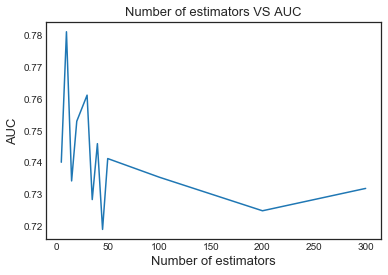

In [21]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e,n_jobs=-1, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
    
plt.plot(estimators,scores) 
plt.title("Number of estimators VS AUC",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)
print(f1_scores)

#### Lets fine tune for number of features with best number of estimator from above analysis

In [22]:
rf_classifier = RandomForestClassifier(n_estimators=10, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))

Area Under Curve 0.7812344656172328


[0.731814415907208, 0.7223971278652306, 0.7624136978735154, 0.7471278652305994, 0.7318282242474453, 0.737738193869097, 0.7600800883733776, 0.7365506766086717, 0.7483153824910246, 0.7530102181717758, 0.741245512289423]


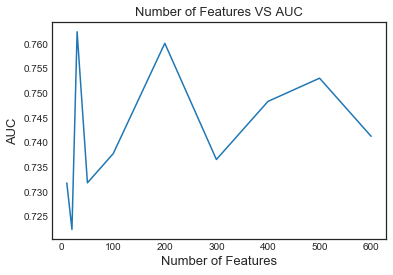

In [23]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=10,random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
    
plt.plot(no_of_features,scores)
plt.title("Number of Features VS AUC",fontsize = 13)
plt.xlabel('Number of Features',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)
print(scores)

#### RFC with Best Parameters

Area Under Curve 0.7624136978735154


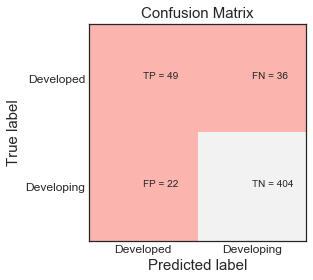

In [24]:
rf_classifier = RandomForestClassifier(n_estimators=10,max_features=30, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

### Extra tree classifier

###### Fine tune for number of estimators

[0.7565175365921016, 0.7341618337475835, 0.7412178956089477, 0.7341618337475835, 0.728279480806407]


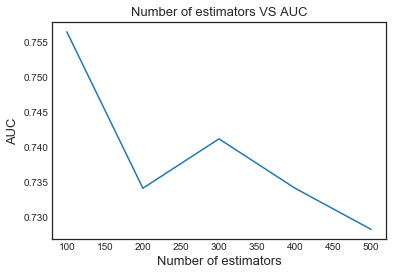

In [26]:
estimators = [100,200,300,400,500]
scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
    
plt.plot(estimators,scores) 
plt.title("Number of estimators VS AUC",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)
print(scores)

In [27]:
model = ExtraTreesClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))

Area Under Curve 0.7565175365921016


#### fine tune for max_features

[0.7259182546257941, 0.7541563104114886, 0.7353355426677713, 0.731814415907208, 0.7400441866887599, 0.7506351836509252, 0.7835818834576085, 0.7729908864954432, 0.7776995305164319, 0.7647611157138912, 0.7965202982601491]


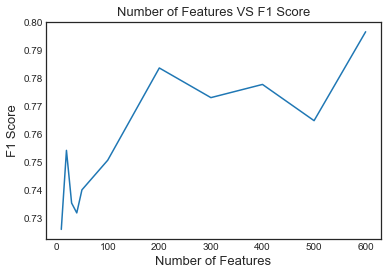

In [28]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=100,random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
    
plt.plot(no_of_features,scores) 
plt.title("Number of Features VS F1 Score",fontsize = 13)
plt.xlabel('Number of Features',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(scores)

#### Best ExtraTree Classifier

Area Under Curve 0.7965202982601491


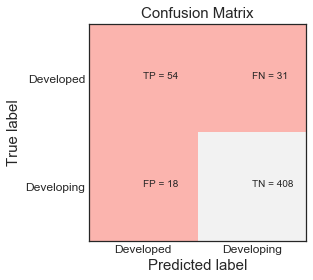

In [29]:
model = ExtraTreesClassifier(n_estimators=100,max_features=600,random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

## Sampling Techniques

## SMOTE SAMPLING TECHNIQUE

In [30]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
df =pd.DataFrame(y_train_res)
y = df[0]
y.value_counts()

1    644
0    644
Name: 0, dtype: int64

Area Under Curve 0.6259320629660314


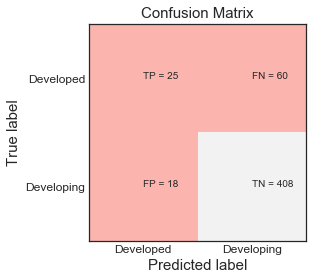

In [31]:
clf = svm.SVC(gamma='auto',C=10,kernel='rbf')
clf.fit(X_train_res,y_train_res)
pred = clf.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

#### Logistic Regression Model

Area Under Cureve 0.74020988677161


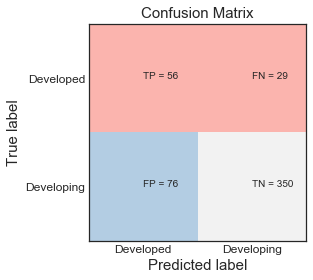

In [32]:
#Logistic Regression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train_res,y_train_res)
pred = logmodel.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Cureve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

Text(0.5,0,'K values')

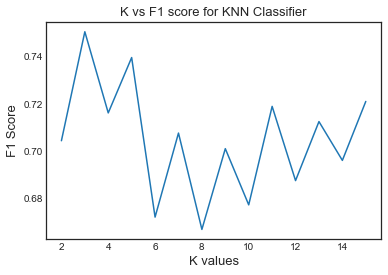

In [33]:
#KNN for different k values
kVals = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res,y_train_res)
    pred = knn.predict(X_test)
    scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,scores)
plt.title('K vs F1 score for KNN Classifier',fontsize = 13)
plt.ylabel('F1 Score',fontsize=13)
plt.xlabel('K values',fontsize=13)

Area Under Curve 0.7038525269262635


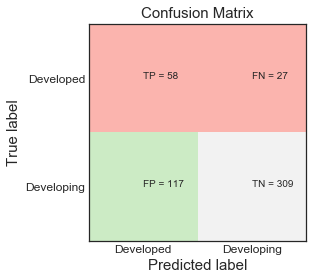

In [34]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res,y_train_res)
pred = knn.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

Area Under Curve 0.7071941452637392


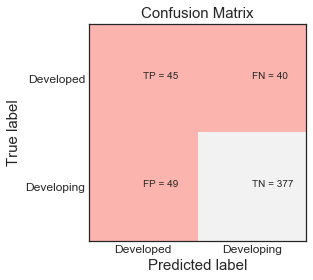

In [35]:
#DT
d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_classifier.fit(X_train_res,y_train_res)
pred = d_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

[0.8910510960350317, 0.8961994321875387, 0.8972504683033393, 0.8927612647960127, 0.8989746526870294]


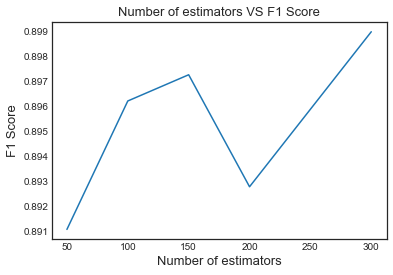

In [36]:
estimators = [50,100,150,200,300]
f1_scores = []
for e in estimators:
    cart = DecisionTreeClassifier()
    model = BaggingClassifier(base_estimator=cart, n_estimators=e, n_jobs=3,random_state=7)
    model.fit(X_train_res, y_train_res)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
plt.title("Number of estimators VS F1 Score",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

Area Under Cureve 0.8082988124827397


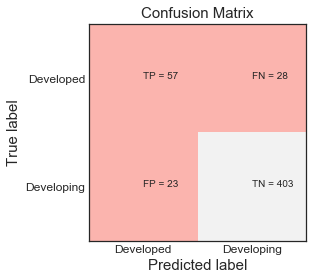

In [37]:
#Bagging Classifier with Decision tree as base learner
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=300, random_state=7)
model.fit(X_train_res, y_train_res)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Cureve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

[0.8610018661024199, 0.8848371217003815, 0.8952902762516759, 0.9090659562817542, 0.9051964225065096, 0.9060665362035225, 0.910397894742478, 0.9099804305283757, 0.9047715911020879, 0.9065021510356294, 0.9060665362035225, 0.9086584649346559, 0.9146809658346988, 0.9129354900569987, 0.9125453387672237]


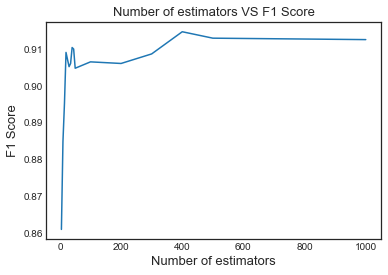

In [38]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300,400,500,1000]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e,n_jobs=-1, random_state = 42)
    rf_classifier.fit(X_train_res,y_train_res)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
plt.title("Number of estimators VS F1 Score",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

#### Lets fine tune for number of features with best number of estimator from above analysis

In [39]:
rf_classifier = RandomForestClassifier(n_estimators=400, random_state = 42)
rf_classifier.fit(X_train_res,y_train_res)
pred = rf_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))

Area Under Curve 0.8541839270919634


[0.9026064073287806, 0.9060665362035225, 0.9142936384493268, 0.9174152256905457, 0.9108028279180942, 0.9181893821561756, 0.9117284567446828, 0.9086484848262331, 0.906423286286162, 0.9034165267158545, 0.9007048748111227]


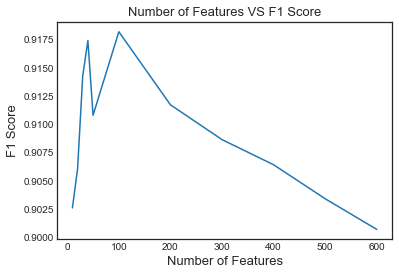

In [40]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=400,random_state = 42)
    rf_classifier.fit(X_train_res,y_train_res)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores)
plt.title("Number of Features VS F1 Score",fontsize = 13)
plt.xlabel('Number of Features',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

#### RFC with Best Parameters

Area Under Curve 0.8471140568903619


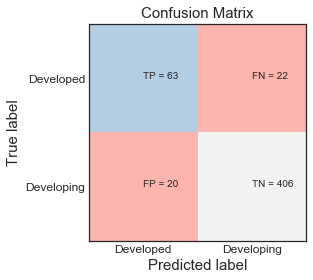

In [41]:
rf_classifier = RandomForestClassifier(n_estimators=400,max_features=40, random_state = 42)
rf_classifier.fit(X_train_res,y_train_res)
pred = rf_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

### Extra tree classifier

###### Fine tune for number of estimators

[0.8932985632380833, 0.8977521841882946, 0.899958917643974, 0.8977521841882946, 0.8977521841882946]


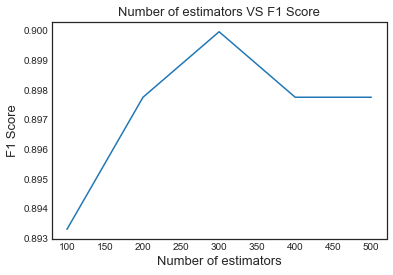

In [42]:
estimators = [100,200,300,400,500]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train_res, y_train_res)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
plt.title("Number of estimators VS F1 Score",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

In [43]:
model = ExtraTreesClassifier(n_estimators=300,random_state=42)
model.fit(X_train_res, y_train_res)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))

Area Under Curve 0.817716100524717


#### fine tune for max_features

[0.8994743441328282, 0.9034165267158545, 0.8967330698035677, 0.8972504683033393, 0.8944773228333317, 0.8994743441328282, 0.8950128743610306, 0.9012023733685955, 0.8944773228333317, 0.8927612647960127, 0.8882147731250417]


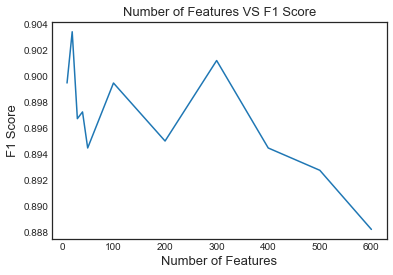

In [44]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=300,random_state=42)
    model.fit(X_train_res, y_train_res)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
plt.title("Number of Features VS F1 Score",fontsize = 13)
plt.xlabel('Number of Features',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

#### Best ExtraTree Classifier

Area Under Curve 0.8200635183650925


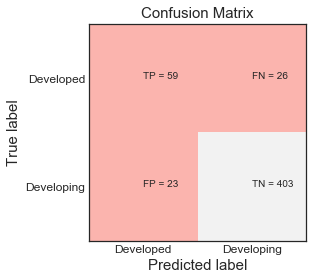

In [45]:
model = ExtraTreesClassifier(n_estimators=300,max_features=20,random_state=42)
model.fit(X_train_res, y_train_res)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

## RANDOM UNDER SAMPLER

In [46]:
under_sampler = RandomUnderSampler(ratio = 1.0,random_state=7)
X_train_res,y_train_res = under_sampler.fit_sample(X_train,y_train)
df =pd.DataFrame(y_train_res)
y = df[0]
y.value_counts()

1    122
0    122
Name: 0, dtype: int64

#### SVM

Area Under Curve 0.6483153824910246


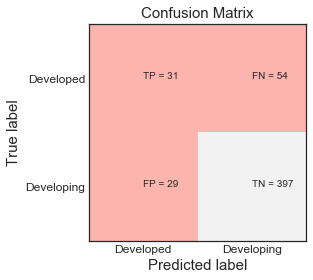

In [47]:
clf = svm.SVC(gamma='auto',C=10,kernel='rbf')
clf.fit(X_train_res,y_train_res)
pred = clf.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

#### Logistic Regression Model

Area Under Cureve 0.6827809997238332


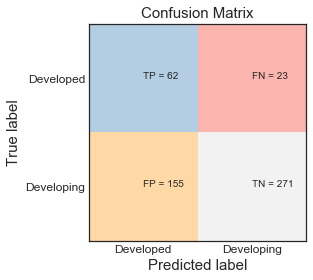

In [48]:
#Logistic Regression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train_res,y_train_res)
pred = logmodel.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Cureve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

Text(0.5,0,'K values')

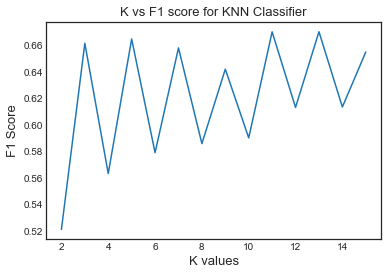

In [49]:
#KNN for different k values
kVals = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res,y_train_res)
    pred = knn.predict(X_test)
    scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,scores)
plt.title('K vs F1 score for KNN Classifier',fontsize = 13)
plt.ylabel('F1 Score',fontsize=13)
plt.xlabel('K values',fontsize=13)

Area Under Curve 0.698135874067937


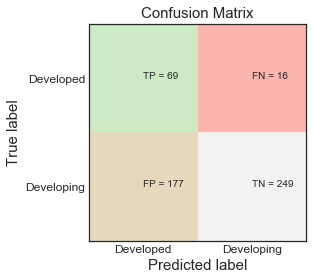

In [50]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_res,y_train_res)
pred = knn.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

Area Under Curve 0.7862192764429716


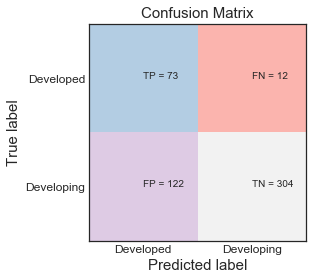

In [51]:
#DT
d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_classifier.fit(X_train_res,y_train_res)
pred = d_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

[0.8243382652484114, 0.8392017280249614, 0.8422061356713887, 0.8422061356713887, 0.8524832577136439]


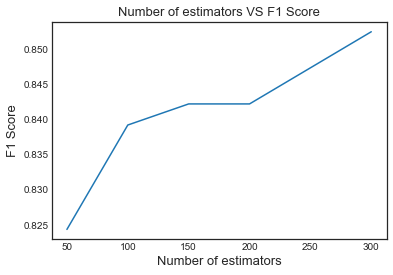

In [52]:
estimators = [50,100,150,200,300]
f1_scores = []
for e in estimators:
    cart = DecisionTreeClassifier()
    model = BaggingClassifier(base_estimator=cart, n_estimators=e, n_jobs=3,random_state=7)
    model.fit(X_train_res, y_train_res)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
plt.title("Number of estimators VS F1 Score",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

Area Under Cureve 0.8731565865782933


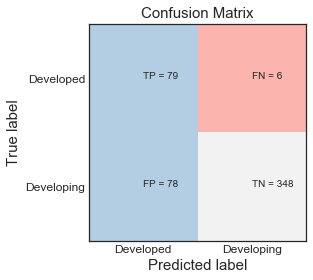

In [53]:
#Bagging Classifier with Decision tree as base learner
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=300, random_state=7)
model.fit(X_train_res, y_train_res)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Cureve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

[0.7845210120860107, 0.7881526816728088, 0.8362563308083039, 0.8287148842005022, 0.845458650938103, 0.8495066148480233, 0.843570457848864, 0.8517006754493396, 0.8489709543258733, 0.8622934843458153, 0.87516683916613, 0.8718750916143401, 0.8702314937550101, 0.8685893221330981, 0.8735201837523124]


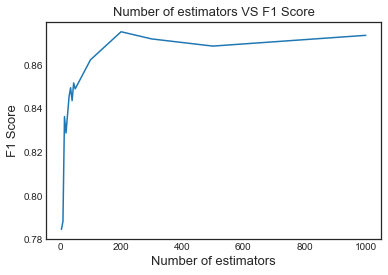

In [54]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300,400,500,1000]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e,n_jobs=-1, random_state = 42)
    rf_classifier.fit(X_train_res,y_train_res)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
plt.title("Number of estimators VS F1 Score",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

#### Lets fine tune for number of features with best number of estimator from above analysis

Area Under Curve 0.8848798674399336


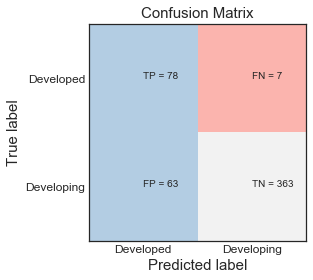

In [55]:
rf_classifier = RandomForestClassifier(n_estimators=200, random_state = 42)
rf_classifier.fit(X_train_res,y_train_res)
pred = rf_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

[0.8617644898227642, 0.8669485096411303, 0.8603975403064507, 0.8620335694252668, 0.8508509190255877, 0.8522317205619592, 0.8573845461878776, 0.8440843095581705, 0.851970925356444, 0.8440843095581705, 0.8508509190255877]


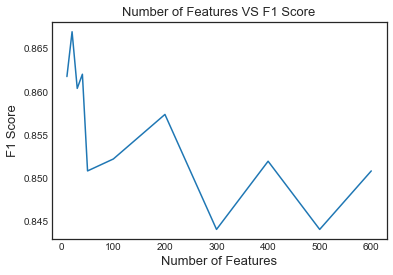

In [56]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=200,random_state = 42)
    rf_classifier.fit(X_train_res,y_train_res)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores)
plt.title("Number of Features VS F1 Score",fontsize = 13)
plt.xlabel('Number of Features',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

#### RFC with Best Parameters

Area Under Curve 0.8848798674399336


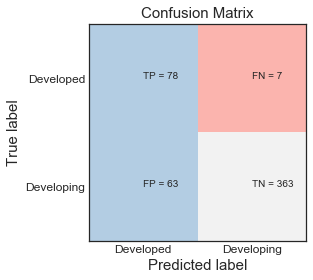

In [57]:
rf_classifier = RandomForestClassifier(n_estimators=200, random_state = 42)
rf_classifier.fit(X_train_res,y_train_res)
pred = rf_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

### Extra tree classifier

###### Fine tune for number of estimators

[0.8634004698982273, 0.8680335156899088, 0.8729596892520308, 0.867439660795825, 0.8693810889492711]


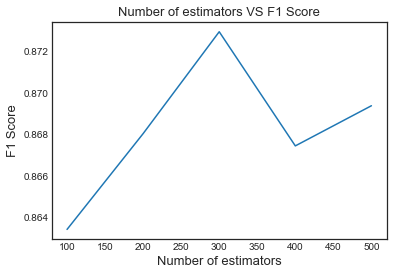

In [58]:
estimators = [100,200,300,400,500]
f1_scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train_res, y_train_res)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
plt.title("Number of estimators VS F1 Score",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

In [59]:
model = ExtraTreesClassifier(n_estimators=300,random_state=42)
model.fit(X_train_res, y_train_res)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))

Area Under Curve 0.8742888704777686


#### fine tune for max_features

[0.8628317485764515, 0.8729596892520308, 0.868316066381405, 0.8663945603017384, 0.8644668539517982, 0.8669485096411303, 0.8620335694252668, 0.8737867952959687, 0.8639317797923634, 0.86721171898355, 0.8704965493840335]


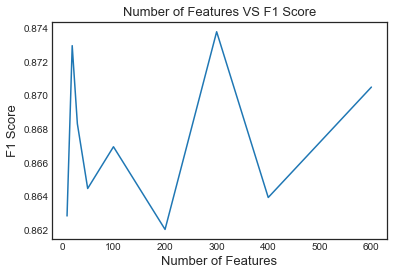

In [60]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
f1_scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=300,random_state=42)
    model.fit(X_train_res, y_train_res)
    pred = model.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(no_of_features,f1_scores) 
plt.title("Number of Features VS F1 Score",fontsize = 13)
plt.xlabel('Number of Features',fontsize = 13)
plt.ylabel('F1 Score',fontsize = 13)
print(f1_scores)

#### Best ExtraTree Classifier

Area Under Curve 0.8884148025407347


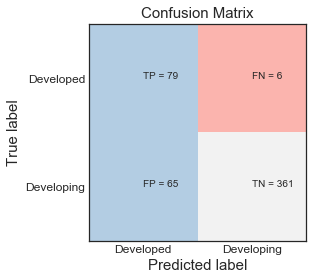

In [61]:
model = ExtraTreesClassifier(n_estimators=300,max_features=300,random_state=42)
model.fit(X_train_res, y_train_res)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

## SMOTE + TOMEK LINKS Sampling Technique

In [62]:
os_ = SMOTETomek(ratio=1, random_state=7)
X_train_res, y_train_res = os_.fit_sample(X_train,y_train)

#### Support Vector Machine

Area Under Curve 0.6306268986467827


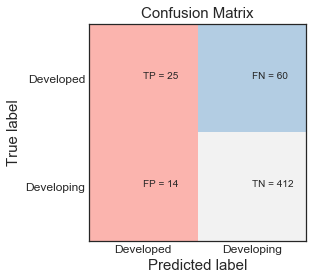

In [63]:
clf = svm.SVC(gamma='auto',C=10,kernel='rbf')
clf.fit(X_train_res,y_train_res)
pred = clf.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

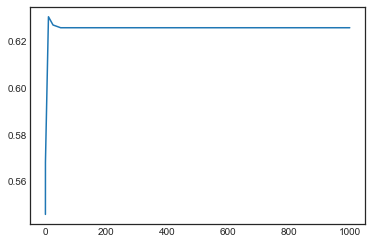

In [64]:
#SVM Fine tunning
cVals = [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]
scores = []
for c in cVals:
    clf = svm.SVC(gamma='auto',C=c,kernel='rbf')
    clf.fit(X_train_res,y_train_res)
    pred = clf.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
plt.plot(cVals,scores)

#### Output with best parameters for SVM

In [65]:
clf = svm.SVC(gamma='auto',C=0.001,kernel='rbf')
clf.fit(X_train_res,y_train_res)
pred = clf.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Cureve" , metrics.auc(fpr,tpr))


Area Under Cureve 0.5459265396299364


###### AUC is 0.5 it means the performance of model is very poor.

#### Logistic Regression

Area Under Curve 0.7390223695111847


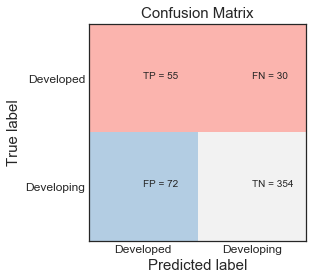

In [66]:
#Logistic Regression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train_res,y_train_res)
pred = logmodel.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

###### KNN with k ranging from 1 to 15

Text(0.5,0,'K values')

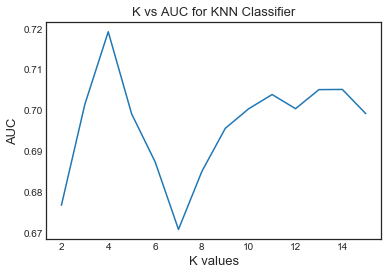

In [67]:
#KNN for different k values
kVals = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res,y_train_res)
    pred = knn.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
    
plt.plot(kVals,scores)
plt.title('K vs AUC for KNN Classifier',fontsize = 13)
plt.ylabel('AUC',fontsize=13)
plt.xlabel('K values',fontsize=13)

#### Output with best value of K

Area Under Curve 0.7192488262910798


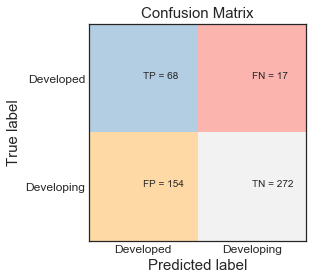

In [68]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_res,y_train_res)
pred = knn.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

#### Decision Tree Classifier

Area Under Curve 0.7060342446837891


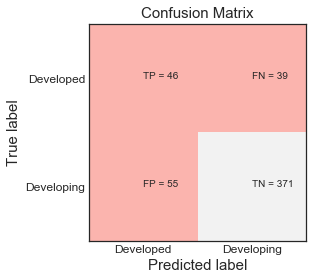

In [69]:
#DT
d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_classifier.fit(X_train_res,y_train_res)
pred = d_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

#### Bagging Classifier with Decision Tree as base estimator

Text(0,0.5,'AUC')

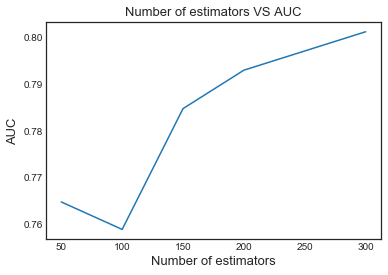

In [70]:
estimators = [50,100,150,200,300]
scores = []
for e in estimators:
    cart = DecisionTreeClassifier()
    model = BaggingClassifier(base_estimator=cart, n_estimators=e, n_jobs=3,random_state=7)
    model.fit(X_train_res, y_train_res)
    pred = model.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
 
    
plt.plot(estimators,scores) 
plt.title("Number of estimators VS AUC",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)


In [71]:
print(scores)

[0.7647749240541287, 0.7588925711129523, 0.7847694007180337, 0.7929991714995857, 0.8012289422811378]


Area Under Curve 0.8012289422811378


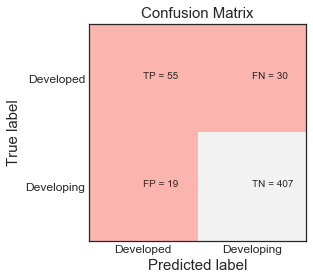

In [72]:
#Bagging Classifier with Decision tree as base learner
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=300, random_state=7)
model.fit(X_train_res, y_train_res)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

#### Random Forest Classifier

#### Fine tuninng Random Forest for different number of estimators

[0.7965617232808617, 0.8365644849489091, 0.8059513946423642, 0.8259596796465065, 0.8483153824910246, 0.837710577188622, 0.8530102181717757, 0.8412455122894229, 0.8577188621927645, 0.8483015741507871, 0.8659486329743165, 0.8612399889533278]


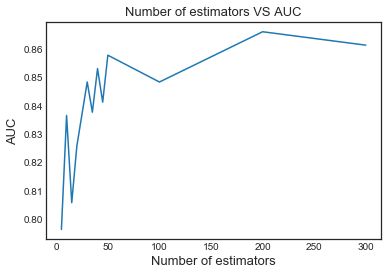

In [73]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e,n_jobs=-1, random_state = 42)
    rf_classifier.fit(X_train_res,y_train_res)
    pred = rf_classifier.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
 
    
plt.plot(estimators,scores) 
plt.title("Number of estimators VS AUC",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)
print(scores)

#### Lets fine tune for number of features with best number of estimator from above analysis

Area Under Curve 0.8412455122894229


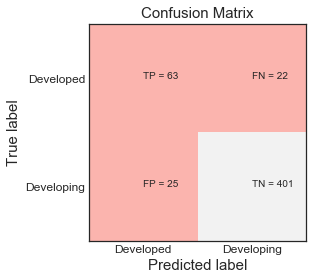

In [74]:
rf_classifier = RandomForestClassifier(n_estimators=45, random_state = 42)
rf_classifier.fit(X_train_res,y_train_res)
pred = rf_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

[0.8412455122894229, 0.8412455122894229, 0.8412455122894229, 0.8412455122894229, 0.8412455122894229, 0.8412455122894229, 0.8412455122894229, 0.8412455122894229, 0.8412455122894229, 0.8412455122894229, 0.8412455122894229]


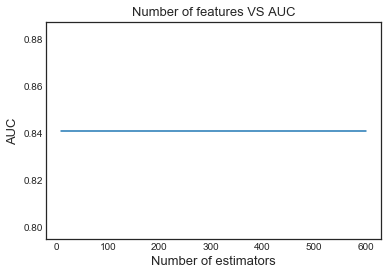

In [75]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=45,random_state = 42)
    rf_classifier.fit(X_train_res,y_train_res)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
 
    
plt.plot(no_of_features,scores) 
plt.title("Number of features VS AUC",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)
print(scores)

#### RFC with Best Parameters

Area Under Curve 0.8247859707263188


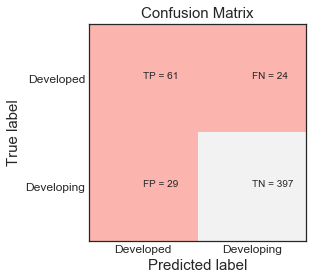

In [76]:
rf_classifier = RandomForestClassifier(n_estimators=45,max_features=10, random_state = 42)
rf_classifier.fit(X_train_res,y_train_res)
pred = rf_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

### Extra tree classifier

###### Fine tune for number of estimators

[0.8130074565037282, 0.8071251035625518, 0.8059513946423642, 0.8012427506213753, 0.8071251035625518]


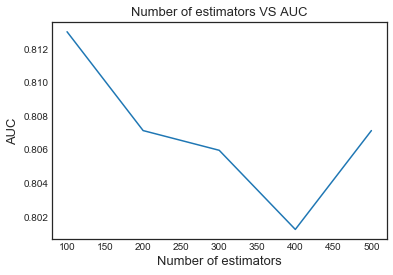

In [77]:
estimators = [100,200,300,400,500]
scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train_res, y_train_res)
    pred = model.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
 
    
plt.plot(estimators,scores) 
plt.title("Number of estimators VS AUC",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)
print(scores)

In [78]:
model = ExtraTreesClassifier(n_estimators=100,random_state=42)
model.fit(X_train_res, y_train_res)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))

Area Under Curve 0.8130074565037282


#### fine tune for max_features

[0.7988953327809997, 0.8294808064070699, 0.814181165423916, 0.8106600386633527, 0.7988953327809997, 0.8082988124827397, 0.7800607566970451, 0.8130074565037282, 0.7906517536592101, 0.7788870477768572, 0.8082988124827397]


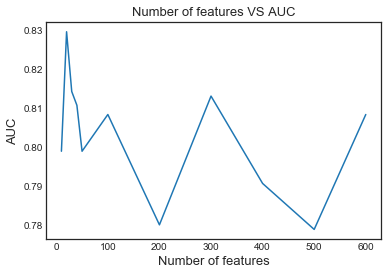

In [79]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=100,random_state=42)
    model.fit(X_train_res, y_train_res)
    pred = model.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
 
    
plt.plot(no_of_features,scores) 
plt.title("Number of features VS AUC",fontsize = 13)
plt.xlabel('Number of features',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)
print(scores)

#### Best ExtraTree Classifier

Area Under Curve 0.8106600386633527


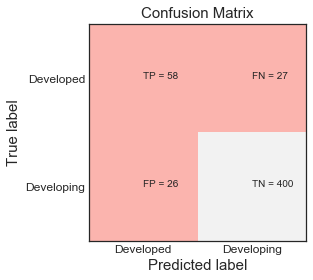

In [80]:
model = ExtraTreesClassifier(n_estimators=100,max_features=40,random_state=42)
model.fit(X_train_res, y_train_res)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

## SMOTE + EEN Sampling Technique

In [81]:
os_ = SMOTEENN(ratio=1, random_state=7)
X_train_res, y_train_res = os_.fit_sample(X_train,y_train)

#### Support Vector Machine

Area Under Curve 0.5832504832919083


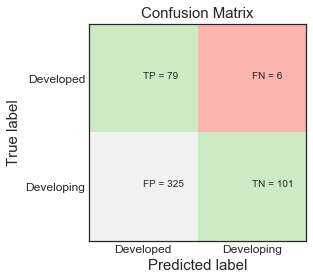

In [82]:
clf = svm.SVC(gamma='auto',C=10,kernel='rbf')
clf.fit(X_train_res,y_train_res)
pred = clf.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

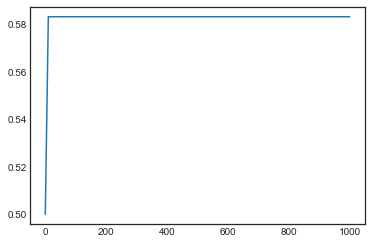

In [83]:
#SVM Fine tunning
cVals = [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]
scores = []
for c in cVals:
    clf = svm.SVC(gamma='auto',C=c,kernel='rbf')
    clf.fit(X_train_res,y_train_res)
    pred = clf.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
plt.plot(cVals,scores)

#### Output with best parameters for SVM

In [84]:
clf = svm.SVC(gamma='auto',C=10,kernel='rbf')
clf.fit(X_train_res,y_train_res)
pred = clf.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Cureve" , metrics.auc(fpr,tpr))

Area Under Cureve 0.5832504832919083


###### AUC is 0.5 it means the performance of model is very poor.

#### Logistic Regression

Area Under Curve 0.6992129246064623


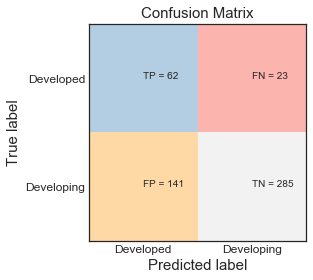

In [85]:
#Logistic Regression
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train_res,y_train_res)
pred = logmodel.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

###### KNN with k ranging from 1 to 15

Text(0.5,0,'K values')

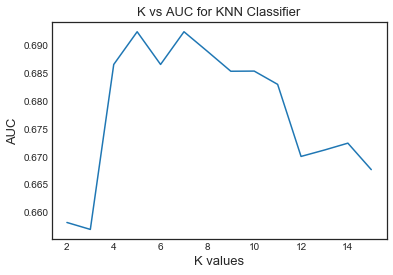

In [86]:
#KNN for different k values
kVals = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res,y_train_res)
    pred = knn.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
    
plt.plot(kVals,scores)
plt.title('K vs AUC for KNN Classifier',fontsize = 13)
plt.ylabel('AUC',fontsize=13)
plt.xlabel('K values',fontsize=13)

#### Output with best value of K

Area Under Curve 0.6923639878486606


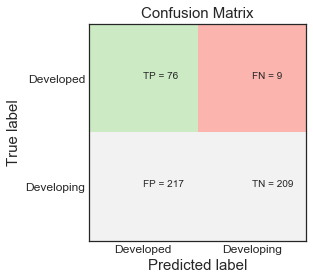

In [87]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res,y_train_res)
pred = knn.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

#### Decision Tree Classifier

Area Under Curve 0.7402789284727976


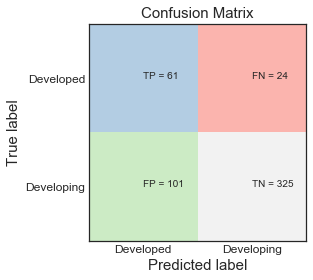

In [88]:
#DT
d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_classifier.fit(X_train_res,y_train_res)
pred = d_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

#### Bagging Classifier with Decision Tree as base estimator

Text(0,0.5,'AUC')

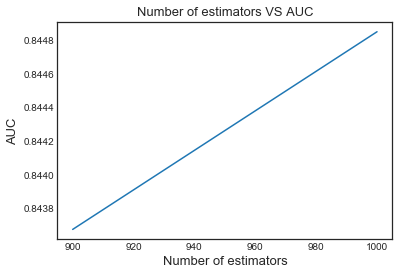

In [89]:
estimators = [900,1000]
scores = []
for e in estimators:
    cart = DecisionTreeClassifier()
    model = BaggingClassifier(base_estimator=cart, n_estimators=e, n_jobs=3,random_state=7)
    model.fit(X_train_res, y_train_res)
    pred = model.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
 
    
plt.plot(estimators,scores) 
plt.title("Number of estimators VS AUC",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)


In [90]:
print(scores)

[0.8436757801712234, 0.8448494890914112]


Area Under Curve 0.8448494890914112


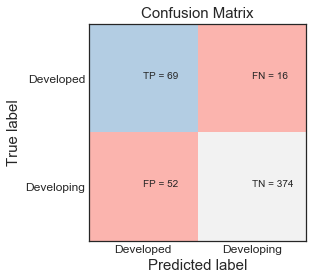

In [91]:
#Bagging Classifier with Decision tree as base learner
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=1000, random_state=7)
model.fit(X_train_res, y_train_res)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

#### Random Forest Classifier

#### Fine tuninng Random Forest for different number of estimators

[0.7872963269814968, 0.8237779618889809, 0.8366611433305717, 0.851974592653963, 0.8613780723557027, 0.8719414526373931, 0.8801850317591825, 0.8860535763601214, 0.8801850317591825, 0.8813449323391328, 0.8719276442971555, 0.8754487710577188]


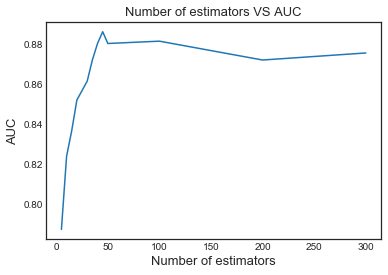

In [92]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,45,50,100,200,300]
scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e,n_jobs=-1, random_state = 42)
    rf_classifier.fit(X_train_res,y_train_res)
    pred = rf_classifier.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
 
    
plt.plot(estimators,scores) 
plt.title("Number of estimators VS AUC",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)
print(scores)

#### Lets fine tune for number of features with best number of estimator from above analysis

Area Under Curve 0.8860535763601214


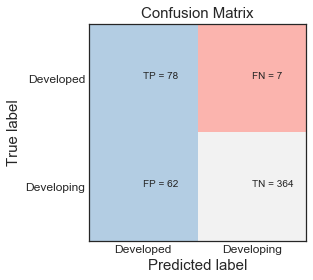

In [93]:
rf_classifier = RandomForestClassifier(n_estimators=45, random_state = 42)
rf_classifier.fit(X_train_res,y_train_res)
pred = rf_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

[0.8860535763601214, 0.8860535763601214, 0.8860535763601214, 0.8860535763601214, 0.8860535763601214, 0.8860535763601214, 0.8860535763601214, 0.8860535763601214, 0.8860535763601214, 0.8860535763601214, 0.8860535763601214]


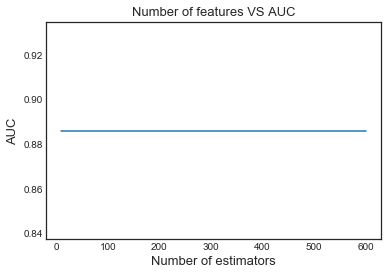

In [94]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
scores = []
for e in no_of_features:
    rf_classifier = RandomForestClassifier(max_features = e ,n_estimators=45,random_state = 42)
    rf_classifier.fit(X_train_res,y_train_res)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
 
    
plt.plot(no_of_features,scores) 
plt.title("Number of features VS AUC",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)
print(scores)

#### RFC with Best Parameters

Area Under Curve 0.8825186412593207


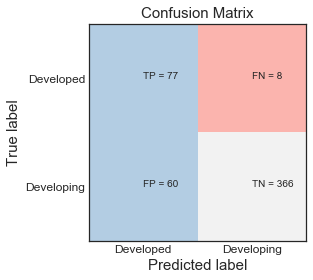

In [95]:
rf_classifier = RandomForestClassifier(n_estimators=45,max_features=10, random_state = 42)
rf_classifier.fit(X_train_res,y_train_res)
pred = rf_classifier.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))

### Extra tree classifier

###### Fine tune for number of estimators

[0.8719414526373931, 0.8672190002761668, 0.8707539353769677, 0.8636978735156035, 0.8566418116542392]


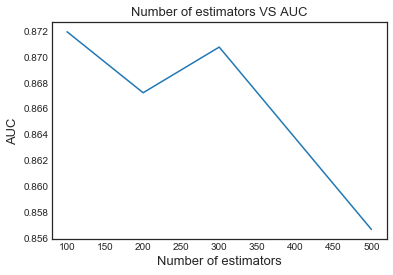

In [96]:
estimators = [100,200,300,400,500]
scores = []
for e in estimators:
    model = ExtraTreesClassifier(n_estimators=e,random_state=42)
    model.fit(X_train_res, y_train_res)
    pred = model.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
 
    
plt.plot(estimators,scores) 
plt.title("Number of estimators VS AUC",fontsize = 13)
plt.xlabel('Number of estimators',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)
print(scores)

In [97]:
model = ExtraTreesClassifier(n_estimators=100,random_state=42)
model.fit(X_train_res, y_train_res)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))

Area Under Curve 0.8719414526373931


#### fine tune for max_features

[0.8648715824357912, 0.8531206848936759, 0.8601767467550402, 0.8742888704777686, 0.8590030378348523, 0.8554681027340514, 0.8695802264567799, 0.8542805854736262, 0.857815520574427, 0.8695664181165423, 0.8601629384148026]


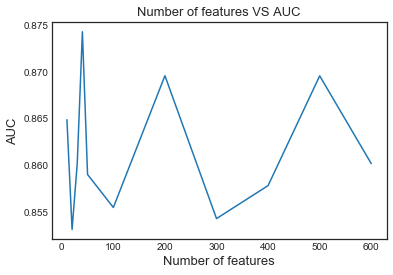

In [98]:
no_of_features = [10,20,30,40,50,100,200,300,400,500,600]
scores = []
for e in no_of_features:
    model = ExtraTreesClassifier(max_features=e,n_estimators=100,random_state=42)
    model.fit(X_train_res, y_train_res)
    pred = model.predict(X_test)
    fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
    scores.append(metrics.auc(fpr,tpr))
 
    
plt.plot(no_of_features,scores) 
plt.title("Number of features VS AUC",fontsize = 13)
plt.xlabel('Number of features',fontsize = 13)
plt.ylabel('AUC',fontsize = 13)
print(scores)

#### Best ExtraTree Classifier

Area Under Curve 0.8742888704777686


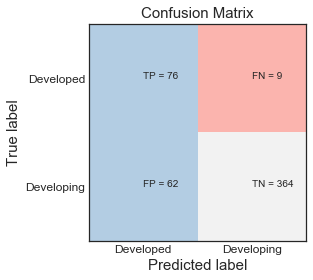

In [99]:
model = ExtraTreesClassifier(n_estimators=100,max_features=40,random_state=42)
model.fit(X_train_res, y_train_res)
pred = model.predict(X_test)
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
print("Area Under Curve" , metrics.auc(fpr,tpr))
plotConfusionMatrix(confusion_matrix(y_test,pred))